# Nama: M. Dhiyaa Abhirama, NIM: 2001575630, Class: LA05, FM-BINUS-AA-FPU-78/V2R0

# 1. A. 4-Point Processing Transformation(theory):
  
 
       • Thresholding: Thresholding is an easy way to segment objects from a background in a given Image.
   
       • Gray-scaling: A grayscaling an image is simply converting image's RGB color to one in which the only colors are shades of gray. The reason for differentiating such images from any other sort of color image is that less information needs to be provided for each pixel.
       
       • Negative transformation: The negative of an image is achieved by replacing the intensity ‘i’ in the original image by ‘i-1’. the darkest pixels will become the brightest and the brightest pixels will become the darkest. Image negative is produced by subtracting each pixel from the maximum intensity value.
       
       • Histogram Equalization: Histogram equalization is a technique for adjusting image intensities to enhance contrast.

  
Mathematic equations formula:

• Thresholding:
   Finding the avarage mean of an image.

• Gray-scaling:
   Grayscale = (R + G + B / 3)

• Negative Transformation:
 
   s = T(r) = (L – 1) – r

Where L - 1 is the max intensity value,
s is the output pixel value and
r is the input pixel value

• Histogram Equalization:       
   pn =(number of pixels with intensity n / total number of pixels) 
n = 0, 1, ..., L − 1. 
      


# 1. B. Implementation of all 4 point processing tranformation in python using OpenCV, Numpy, And Matplotlib

In [ ]:
#1. read image
#2. grayscaling
#3. thresholding
#4. negative transformation
#5. histogram equalization

import numpy as np
import cv2
from matplotlib import pyplot as plt

#Converting GIF to JPEG
gif = cv2.VideoCapture('lena_color.gif')
ret, frame = gif.read()
cv2.imwrite('lena_color.jpeg', frame)

img = cv2.imread('lena_color.jpeg')

#Grayscaling
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Thresholding
ret,thresh1 = cv2.threshold(grayscale,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(grayscale,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(grayscale,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(grayscale,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(grayscale,127,255,cv2.THRESH_TOZERO_INV)

#Negative Transformation
neg_img = cv2.bitwise_not(img)

#histogram equalization
h_equ = cv2.equalizeHist(grayscale)    

#display results  
cv2.imshow('Original', img)

cv2.imshow('Grayscale', grayscale)

cv2.imshow('Binary Threshold', thresh1)
cv2.imshow('Binary Inverse Threshold', thresh2)
cv2.imshow('Trunc Threshold', thresh3)
cv2.imshow('ToZero Threshold', thresh4)
cv2.imshow('ToZero Inverse Threshold', thresh5)

cv2.imshow('Negative Transformation', neg_img)

cv2.imshow('Histogram Equalization', h_equ)

cv2.waitKey(0)
cv2.destroyAllWindows()

# 2. Convolution A&B

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('Sydney-Opera-House.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = [
            [1/9, 1/9, 1/9],
            [1/9, 1/9, 1/9],
            [1/9, 1/9, 1/9]
]

kernel2 = [
            [1, 0, -1],
            [1, 0, -1],
            [1, 0, -1]
]

kernel = np.array(kernel)
kernel2 = np.array(kernel2)

filtered = cv2.filter2D(gray, -1, kernel)
filtered2 = cv2.filter2D(gray, -1, kernel2)

f = plt.figure(figsize=(15,15))

f.add_subplot(2, 1, 1).set_title('Filtered Image 3x3 1/9')
plt.imshow(filtered, cmap = "gray")

f.add_subplot(2,1,2).set_title('Filtered Image 3x3 1,0,-1')
plt.imshow(filtered2, cmap = "gray")

plt.show()

# 3. A. Harris Corner Detector (Theory)

First of all is finding an interest point is a point in an image which has a well-defined position and can be detected. This means that an interest point can be a corner but it can also be, for example, an isolated point of local intensity maximum or minimum, line endings, or a point on a curve where the curvature is locally maximal.

The basic idea of corner detection is extracting certain kinds of features and infer the contents of an image, A corner can be defined as the intersection of two edges. A corner can also be defined as a point for which there are two dominant and different edge directions in a local neighbourhood of the point.



# 3. B. Harris Corner Detector
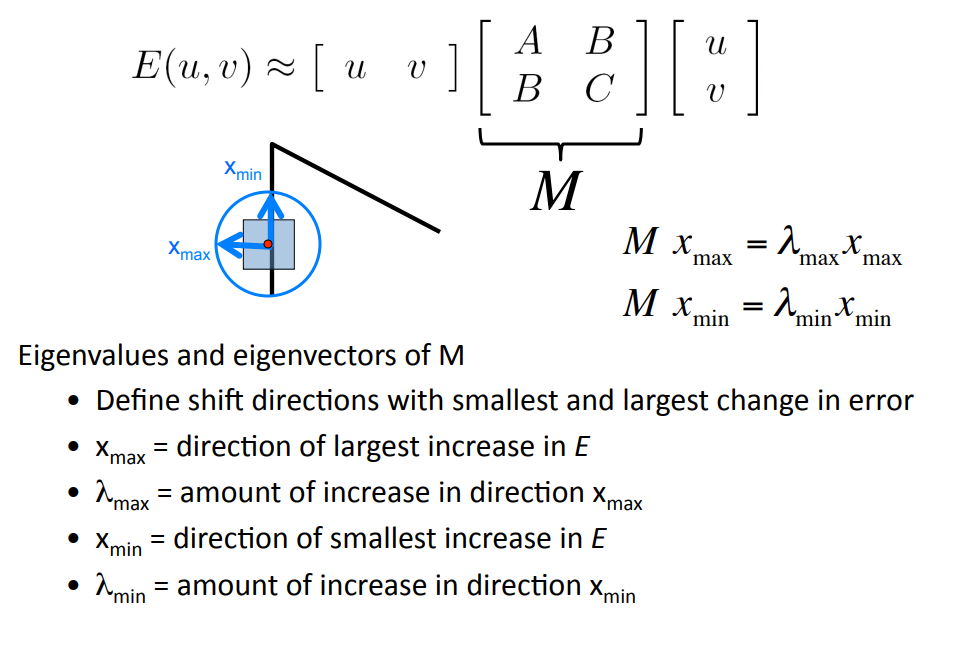

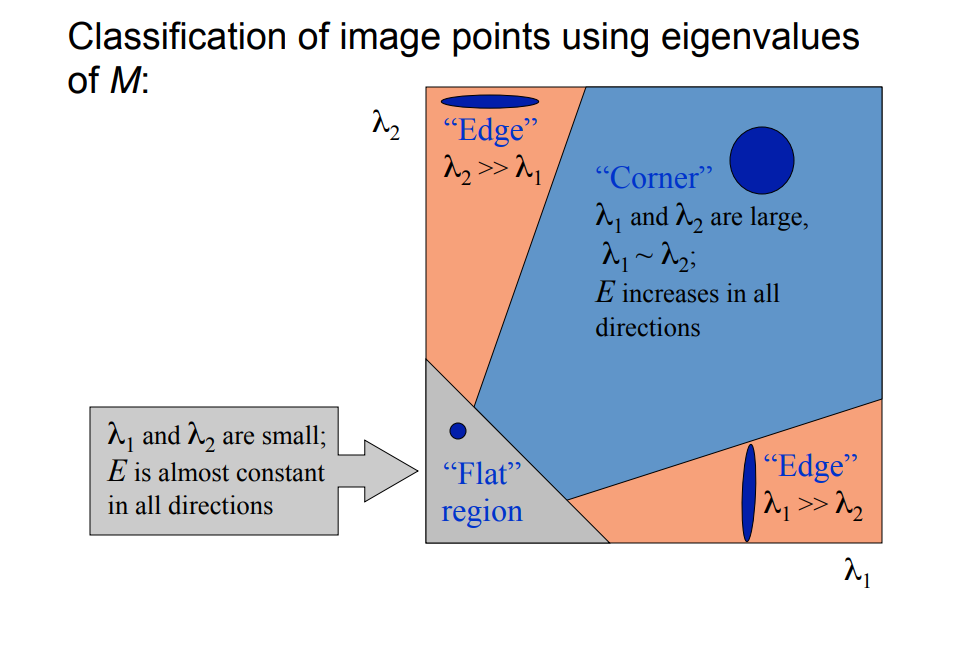

# 3. C. Harris Corner Detector Paper Steps:

The change, E, for the small shift (x,y) can be concisely
written as
E(x,y) = (x,y)M(x,y)T
where the 2x2 symmetric matrix M is

      
 M =  
 
      [A C]
      [C B]


Note that E is closely related to the local autocorrelation
function, with M describing its shape at the origin
(explicitly, the quadratic terms in the Taylor expansion).
Let a,P be the eigenvalues of M. a and P will be
proportional to the principal curvatures of the local auto149
correlation function, and form a rotationally invariant
description of M.

There are three cases to be
considered:

A. If both curvatures are small, so that the local autocorrelation function is flat, then the windowed image
region is of approximately constant intensity (ie.
arbitrary shifts of the image patch cause little change in
E),

B. If one curvature is high and the other low, so that the
local auto-correlation function is ridge shaped, then
only shifts along the ridge (ie. along the edge) cause
little change in E: this indicates an edge,

C. If both curvatures are high, so that the local autocorrelation function is sharply peaked, then shifts in
any direction will increase E: this indicates a corner.


CORNER/EDGE RESPONSE FUNCTION

Not only do we need corner and edge classification regions,
but also a measure of corner and edge quality or response.

It is attractive to use
Tr(M) and Det(M) in the formulation, as this avoids the
explicit eigenvalue decomposition of M,

Tr(M) =a+P = A+B

Det(M) = a p = AB - C2

Consider the following inspired formulation for the corner
response,

R = Det - k Tr2

by that in all cases increases the magnitude of the
response. The flat region is specified by Tr falling below
some selected threshold.

A corner region pixel is selected as a nominated corner pixel if its response is an 8-
way local maximum.

By applying low and high thresholds, edge hysteresis can be carried out, and this can enhance the continuity of edges. These classifications thus result in a 5-level image comprising: background, two corner classes and two edge classes. 

This results in continuous thin edges that generally terminate in the corner regions. The edge terminators are then linked to the corner pixels residing within the corner regions, to form a connected edge-vertex graph.



# 3. D. Harris Corner Detector Code:

In [ ]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

#1. load image
img = cv2.imread('checkerboard_101.png')

#2. convert to greyscale dan float 32
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray = np.float32(img_gray)

#3. call function
harris_result = cv2.cornerHarris(img_gray, 2, 5, 0.04)

without_subpix = img.copy()
without_subpix[harris_result > 0.01*harris_result.max()] = [0,0,255]
without_subpix = cv2.cvtColor(without_subpix, cv2.COLOR_BGR2RGB)
plt.imshow(without_subpix)
plt.show()



# 4. A. Canny Edge Detector (Noise Reduction)

Canny Edge Dectector uses Gaussian Filter to remove noise and smooth the image. Since all edge detection results are easily affected by the noise in the image, it is essential to filter out the noise to prevent false detection caused by it.  To smooth the image, a Gaussian filter kernel is convolved with the image. It is important to understand that the selection of the size of the Gaussian kernel will affect the performance of the detector. The larger the size is, the lower the detector's sensitivity to noise. Additionally, the localization error to detect the edge will slightly increase with the increase of the Gaussian filter kernel size.

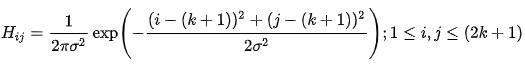

# 4. B. Canny Edge Detector (Intensity Gradient Of The Image)

An edge in an image may point in a variety of directions, so the Canny algorithm uses four filters to detect horizontal, vertical and diagonal edges in the blurred image. The edge detection operator (such as Roberts, Prewitt, or Sobel) returns a value for the first derivative in the horizontal direction (Gx) and the vertical direction (Gy). From this the edge gradient and direction can be determined:

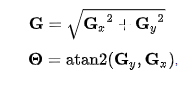
where G can be computed using the hypot function and atan2 is the arctangent function with two arguments. The edge direction angle is rounded to one of four angles representing vertical, horizontal and the two diagonals (0°, 45°, 90° and 135°). An edge direction falling in each color region will be set to a specific angle values.

# 4. C. Canny Edge Detector (Non-maximum Suppression)
Non-maximum suppression is an edge thinning technique.

Non-maximum suppression is applied to find the locations with the sharpest change of intensity value. The algorithm for each pixel in the gradient image is:

Compare the edge strength of the current pixel with the edge strength of the pixel in the positive and negative gradient directions.
If the edge strength of the current pixel is the largest compared to the other pixels in the mask with the same direction (e.g., a pixel that is pointing in the y-direction will be compared to the pixel above and below it in the vertical axis), the value will be preserved. Otherwise, the value will be suppressed.

# 4. D. Canny Edge Detector (Hysteresis Thresholding)

Hysteresis Thresholding, some edge pixels remain that are caused by noise and color variation. In order to account for these spurious responses, it is essential to filter out edge pixels with a weak gradient value and preserve edge pixels with a high gradient value. 

The solution is Double Thresholding, it can be accomplished by selecting high and low threshold values. If an edge pixel’s gradient value is higher than the high threshold value, it is marked as a strong edge pixel. If an edge pixel’s gradient value is smaller than the high threshold value and larger than the low threshold value, it is marked as a weak edge pixel. If an edge pixel's gradient value is smaller than the low threshold value, it will be suppressed. 

# 4. Canny Edge Detector Implementation (Code)

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('DetectAndMeasureCircularObjectsThingSpeakExample_01.png')
greyscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(greyscale,100,200)


plt.subplot(122),plt.imshow(edges, cmap = 'gray')
plt.title('Canny Edge Result'), plt.xticks([]), plt.yticks([])

plt.show()